In [130]:
!pip install matplotlib seaborn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [132]:
def preprocess_tweet(tweet):
    # Remove URLs, mentions, and hashtags
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'@\w+|#\w+', '', tweet)

    # Convert to lowercase
    tweet = tweet.lower()

    # Remove punctuation and special characters
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Remove stop words and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tweet = ' '.join([lemmatizer.lemmatize(word) for word in tweet.split() if word not in stop_words])

    return tweet

# Load the tweets dataset, specifying the encoding and no header
tweets_df = pd.read_csv('tweet_100K.csv', encoding='latin-1', header=None)  # header=None tells pandas there are no headers

# Assign column names
tweets_df.columns = ['id', 'timestamp', 'date', 'query', 'user', 'tweet'] # Replace with your actual column order

# Apply preprocessing to the 'tweet' column
tweets_df['text'] = tweets_df['tweet'].apply(preprocess_tweet)

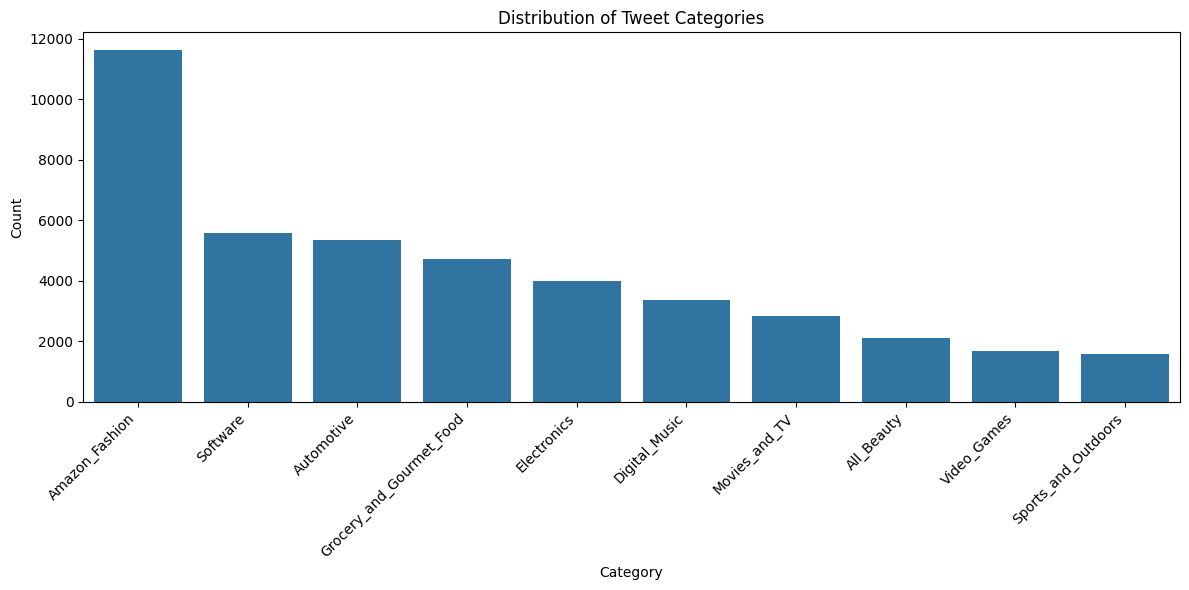

In [133]:
def assign_category(tweet):
    categories = {
        "All_Beauty": ["beauty", "makeup", "cosmetics", "skincare", "haircare", "fragrance", "perfume", "nail", "salon", "spa", "lotion", "cream", "lipstick", "eyeliner", "mascara", "foundation", "blush", "eyeshadow", "shampoo", "conditioner", "hairstyling", "manicure", "pedicure", "facial", "massage", "waxing", "sephora", "ulta", "mac", "maybelline", "loreal", "revlon", "clinique", "este lauder", "lancome"],
        "Amazon_Fashion": ["fashion", "clothing", "shoes", "accessories", "dress", "shirt", "pants", "jeans", "jacket", "coat", "handbag", "jewelry", "watch", "sunglasses", "style", "trend", "outfit", "apparel", "footwear", "sneaker", "heel", "boot", "sandal", "scarf", "belt", "hat", "bag", "purse", "wallet", "necklace", "earring", "bracelet", "ring", "nike", "adidas", "puma", "zara", "h&m", "forever 21", "levi's", "ralph lauren", "gucci", "prada", "louis vuitton"],
        "Automotive": ["car", "vehicle", "auto", "engine", "tire", "wheel", "brake", "repair", "maintenance", "driving", "road", "travel", "automobile", "truck", "suv", "sedan", "coupe", "sports car", "electric car", "hybrid car", "gasoline", "diesel", "mileage", "fuel", "transmission", "steering", "suspension", "airbag", "seatbelt", "navigation", "gps", "tesla", "toyota", "honda", "ford", "chevrolet", "bmw", "mercedes-benz", "audi", "volkswagen"],
        "Electronics": ["electronics", "gadget", "phone", "laptop", "computer", "tablet", "camera", "tv", "speaker", "headphone", "charger", "battery", "smartphone", "android", "ios", "iphone", "samsung", "google", "apple", "dell", "hp", "lenovo", "asus", "acer", "sony", "canon", "nikon", "bose", "jbl", "beats", "anker", "belkin"],
        "Digital_Music": ["music", "song", "album", "artist", "band", "singer", "concert", "streaming", "spotify", "apple music", "mp3", "audio", "playlist", "genre", "rock", "pop", "hip hop", "classical", "jazz", "country", "electronic", "dance", "sound", "melody", "rhythm", "instrument", "guitar", "piano", "drums", "vocals", "microphone"],
        "Software": ["software", "program", "app", "code", "development", "programming", "web", "mobile", "database", "cloud", "python", "java", "application", "website", "design", "coding", "algorithm", "data", "security", "cybersecurity", "artificial intelligence", "machine learning", "deep learning", "microsoft", "google", "apple", "amazon", "facebook", "oracle", "salesforce", "adobe"],
        "Sports_and_Outdoors": ["sport", "outdoor", "fitness", "hiking", "running", "cycling", "swimming", "yoga", "gym", "camping", "fishing", "hunting", "football", "basketball", "baseball", "soccer", "tennis", "golf", "cricket", "hockey", "volleyball", "training", "exercise", "workout", "equipment", "gear", "apparel", "shoes", "nike", "adidas", "under armour", "reebok", "columbia", "patagonia", "north face"],
        "Video_Games": ["game", "gaming", "console", "playstation", "xbox", "nintendo", "pc gaming", "steam", "online", "multiplayer", "controller", "virtual reality", "video game", "esports", "streamer", "twitch", "youtube", "action", "adventure", "rpg", "strategy", "shooter", "simulation", "sports", "racing", "puzzle", "fortnite", "call of duty", "league of legends", "minecraft", "grand theft auto", "fifa", "madden"],
        "Grocery_and_Gourmet_Food": ["food", "grocery", "gourmet", "recipe", "cooking", "baking", "restaurant", "cafe", "meal", "dinner", "lunch", "breakfast", "organic", "vegan", "vegetarian", "produce", "meat", "seafood", "dairy", "bakery", "snacks", "beverages", "coffee", "tea", "wine", "beer", "chocolate", "cheese", "pasta", "rice", "bread", "cereal", "fruits", "vegetables", "whole foods", "trader joe's", "walmart", "target", "kroger", "amazon fresh", "instacart"],
        "Movies_and_TV": ["movie", "film", "tv", "series", "cinema", "netflix", "hulu", "amazon prime", "actor", "actress", "director", "trailer", "drama", "comedy", "action", "adventure", "sci-fi", "fantasy", "horror", "thriller", "romance", "documentary", "animation", "anime", "superhero", "marvel", "dc", "disney", "pixar", "hbo", "showtime", "starz", "amc", "fx", "cnn", "fox", "nbc", "cbs", "abc"]
    }
    exclude_categories = ["Other"]  # List of categories to exclude

    found_categories = []
    for category, keywords in categories.items():
        if category not in exclude_categories:  # Check if category should be excluded
            for keyword in keywords:
                if keyword in tweet:
                    found_categories.append(category)
                    # Optional: Add break here if you only want the first match per category

    return found_categories  # Return the list of found categories (could be empty)


# Load the tweets dataset using the correct encoding
tweets_df = pd.read_csv('tweet_100K.csv', encoding='latin-1', header=None)
tweets_df.columns = ['id', 'timestamp', 'date', 'query', 'user', 'tweet']

# Preprocess the tweets
tweets_df['text'] = tweets_df['tweet'].apply(preprocess_tweet)

# Assign categories using the function
tweets_df['category'] = tweets_df['text'].apply(assign_category)

# Explode the 'category' column to create individual rows for each category
tweets_df_exploded = tweets_df.explode('category')

# Create a DataFrame with category counts using the exploded DataFrame
category_counts = tweets_df_exploded['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Visualize category counts using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Tweet Categories')
plt.tight_layout()
plt.show()

# Split into training and testing sets (using the exploded DataFrame)
X_train, X_test, y_train, y_test = train_test_split(
    tweets_df_exploded['text'], tweets_df_exploded['category'], test_size=0.2, random_state=42
)


In [134]:
import pandas as pd
from collections import defaultdict

user_categories = defaultdict(lambda: defaultdict(int))

for index, row in tweets_df.iterrows():
    user = row['user']
    # Access the 'category' column instead of 'categories'
    categories = row['category']
    for category in categories:
        user_categories[user][category] += 1

# Convert to DataFrame for easier analysis
user_category_df = pd.DataFrame.from_dict(user_categories, orient='index').fillna(0)

In [135]:
def get_top_categories(user, threshold=3):  # Example threshold
    """Returns the top categories for a user based on frequency."""
    # Check if the user exists in the DataFrame index
    if user not in user_category_df.index:
        print(f"User '{user}' not found in the dataset.")
        return []  # Or raise an exception if you prefer

    category_counts = user_category_df.loc[user].sort_values(ascending=False)
    top_categories = category_counts[category_counts >= threshold].index.tolist()
    return top_categories

# Get a list of actual user IDs from your DataFrame
actual_user_ids = tweets_df['user'].unique().tolist()

# Print a few user IDs to see their format
print("Some user IDs in your dataset:", actual_user_ids[:50])  # Print the first 50

# Example usage: Replace 'user1' with an actual user ID from your dataset
top_categories_for_user = get_top_categories(actual_user_ids[0])
print(f"Top categories for user {actual_user_ids[0]}: {top_categories_for_user}")

Some user IDs in your dataset: ['_TheSpecialOne_', 'scotthamilton', 'mattycus', 'ElleCTF', 'Karoli', 'joy_wolf', 'mybirch', 'coZZ', '2Hood4Hollywood', 'mimismo', 'erinx3leannexo', 'pardonlauren', 'TLeC', 'robrobbierobert', 'bayofwolves', 'HairByJess', 'lovesongwriter', 'armotley', 'starkissed', 'gi_gi_bee', 'quanvu', 'swinspeedx', 'cooliodoc', 'viJILLante', 'Ljelli3166', 'ChicagoCubbie', 'KatieAngell', 'gagoo', 'abel209', 'BaptisteTheFool', 'fatkat309', 'EmCDL', 'merisssa', 'Pbearfox', 'jsoo', 'scarletletterm', 'crosland_12', 'ajaxpro', 'Tmttq86', 'Anthony_Nguyen', 'itsanimesh', 'lionslamb', 'kennypham', 'DdubsShellBell', 'hpfangirl94', 'antzpantz', 'labrt2004', 'IrisJumbe', 'peacoats', 'cyantist']
Top categories for user _TheSpecialOne_: []


In [137]:
# Drop rows with NaN values in y_train
train_data = pd.DataFrame({'text': X_train, 'category': y_train})
train_data.dropna(subset=['category'], inplace=True)

# Update X_train and y_train
X_train = train_data['text']
y_train = train_data['category']

# Now you can proceed with creating the TF-IDF vectors and training the classifier:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)  # Should work without the ValueError now

MultinomialNB()

In [139]:
# Drop rows with NaN values in y_train and y_test
train_data = pd.DataFrame({'text': X_train, 'category': y_train})
train_data.dropna(subset=['category'], inplace=True)
X_train = train_data['text']
y_train = train_data['category']

test_data = pd.DataFrame({'text': X_test, 'category': y_test})
test_data.dropna(subset=['category'], inplace=True)
X_test = test_data['text']
y_test = test_data['category']

# Now proceed with creating TF-IDF vectors and training/evaluating the classifier
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

y_pred = classifier.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5296134294833905


In [140]:
# Function to save the model and vectorizer
def save_model_and_vectorizer(classifier, vectorizer):
  import pickle
  with open('tweet_classifier.pkl', 'wb') as f:
      pickle.dump(classifier, f)
  with open('tfidf_vectorizer.pkl', 'wb') as f:
      pickle.dump(vectorizer, f)

In [141]:
# Funktion zur Vorhersage der Tweet-Kategorie
def predict_tweet_category(tweet):
  import pickle
  # Lade den Klassifikator und den Vektorisierer
  with open('tweet_classifier.pkl', 'rb') as f:
      classifier = pickle.load(f)
  with open('tfidf_vectorizer.pkl', 'rb') as f:
      vectorizer = pickle.load(f)

  # Import the preprocess_tweet function if it's in a different file/cell
  from IPython.display import display # This line ensures the current cell is displayed
                                     # after execution, preventing issues with function
                                     # visibility across cells in a notebook environment
  from __main__ import preprocess_tweet # This import specifically imports the
                                        # preprocess_tweet function that might be defined
                                        # earlier in the IPython notebook session.

  # Check if the input is a string
  if not isinstance(tweet, str):
      raise TypeError("Input 'tweet' must be a string.")

  # Vorverarbeiten des Tweets, ähnlich wie bei tweets_df['tweet'].apply(preprocess_tweet)
  processed_tweet = preprocess_tweet(tweet)

  # Transformiere den Tweet mit dem Vektorisierer
  tweet_vec = vectorizer.transform([processed_tweet])

  # Sage die Kategorie voraus
  predicted_category = classifier.predict(tweet_vec)[0]

  return predicted_category

In [142]:
# Call the save function to save your model and vectorizer
save_model_and_vectorizer(classifier, vectorizer)

# Example usage of the prediction function
new_tweet = "hahahaha"
predicted_category = predict_tweet_category(new_tweet)
print(f"Predicted category: {predicted_category}")

Predicted category: Amazon_Fashion


In [143]:
!pip install datasketch scikit-learn
from datasketch import MinHash, MinHashLSH
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
import pandas as pd

# Assuming user_category_df is the DataFrame with user and category data
# Create a DataFrame with top categories for each user
cluster_df = user_category_df.apply(lambda row: row[row > 0].index.tolist(), axis=1).reset_index()
cluster_df.columns = ['user', 'top_categories']
# Create a dictionary mapping categories to cluster numbers
category_clusters = {
    "Amazon_Fashion": 0,
    "Automotive": 1,
    "Electronics": 2,
    "All_Beauty" :3,
    "Digital_Music": 4,
    "Software": 5,
    "Sports_and_Outdoors":6,
    "Video_Games": 7,
    "Grocery_and_Gourmet_Food": 8,
    "Movies_and_TV": 9
    }


# Create a new column in cluster_df to store the category-based cluster
cluster_df['category_cluster'] = cluster_df['top_categories'].apply(lambda top_cats: category_clusters.get(top_cats[0], -1) if top_cats else -1)

# -1 represents users with no assigned category or a top category not in your predefined list.
filtered_cluster_df = cluster_df[cluster_df['category_cluster'] != -1]

# Display the filtered DataFrame
display(filtered_cluster_df)

,user,top_categories,category_cluster
0,_TheSpecialOne_,"[Amazon_Fashion, Automotive]",0
1,erinx3leannexo,[Amazon_Fashion],0
2,TLeC,[Amazon_Fashion],0
3,HairByJess,[Amazon_Fashion],0
4,lovesongwriter,"[Amazon_Fashion, Movies_and_TV]",0
...,...,...,...
28557,rebekahnew,[All_Beauty],3
28558,roycerosenblatt,[All_Beauty],3
28559,afinzel,[All_Beauty],3
28560,Sarah2188,[All_Beauty],3


In [145]:
from datasketch import MinHash, MinHashLSH

def create_minhash(text):
    """Creates a MinHash signature for the given text."""
    minhash = MinHash(num_perm=64)  # Adjust num_perm for desired accuracy
    for word in text.split():
        minhash.update(word.encode('utf8'))
    return minhash

# Create MinHashes for all tweets
tweets_df['minhash'] = tweets_df['text'].apply(create_minhash)

# Create MinHashLSH index
lsh = MinHashLSH(threshold=0.5, num_perm=64)  # Adjust threshold for similarity
# Add a check to see if the key already exists before inserting
for index, row in tweets_df.iterrows():
    if row['id'] not in lsh:  # Check if key exists
        lsh.insert(row['id'], row['minhash'])


def adjust_cluster_with_minhash(user_id, current_cluster):
    """Adjusts the cluster of a user based on MinHash similarity."""
    user_tweets = tweets_df[tweets_df['user'] == user_id]

    if user_tweets.empty:
        return current_cluster

    user_minhash = user_tweets['minhash'].iloc[0]

    similar_tweets = lsh.query(user_minhash)

    # Instead of directly accessing 'category_cluster' from tweets_df,
    # use a merge to get the cluster information from filtered_cluster_df
    similar_tweets_df = tweets_df[tweets_df['id'].isin(similar_tweets)]
    merged_df = pd.merge(similar_tweets_df, filtered_cluster_df[['user', 'category_cluster']], on='user', how='inner')

    similar_clusters = merged_df['category_cluster'].tolist()

    if similar_clusters:
        most_common_cluster = max(set(similar_clusters), key=similar_clusters.count)
        return most_common_cluster
    else:
        return current_cluster

# Apply the adjustment to the filtered_cluster_df
filtered_cluster_df['adjusted_cluster'] = filtered_cluster_df.apply(
    lambda row: adjust_cluster_with_minhash(row['user'], row['category_cluster']), axis=1
)

# Display the updated DataFrame
display(filtered_cluster_df)

,user,top_categories,category_cluster,adjusted_cluster
0,_TheSpecialOne_,"[Amazon_Fashion, Automotive]",0,0
1,erinx3leannexo,[Amazon_Fashion],0,0
2,TLeC,[Amazon_Fashion],0,0
3,HairByJess,[Amazon_Fashion],0,0
4,lovesongwriter,"[Amazon_Fashion, Movies_and_TV]",0,0
...,...,...,...,...
28557,rebekahnew,[All_Beauty],3,3
28558,roycerosenblatt,[All_Beauty],3,3
28559,afinzel,[All_Beauty],3,3
28560,Sarah2188,[All_Beauty],3,3


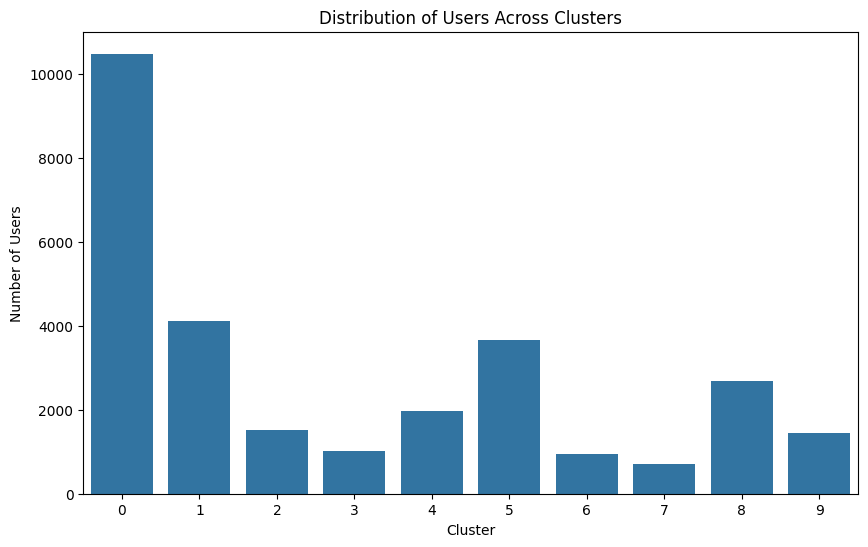

In [146]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category_cluster', data=filtered_cluster_df)  # Changed 'cluster' to 'category_cluster'
plt.title('Distribution of Users Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()

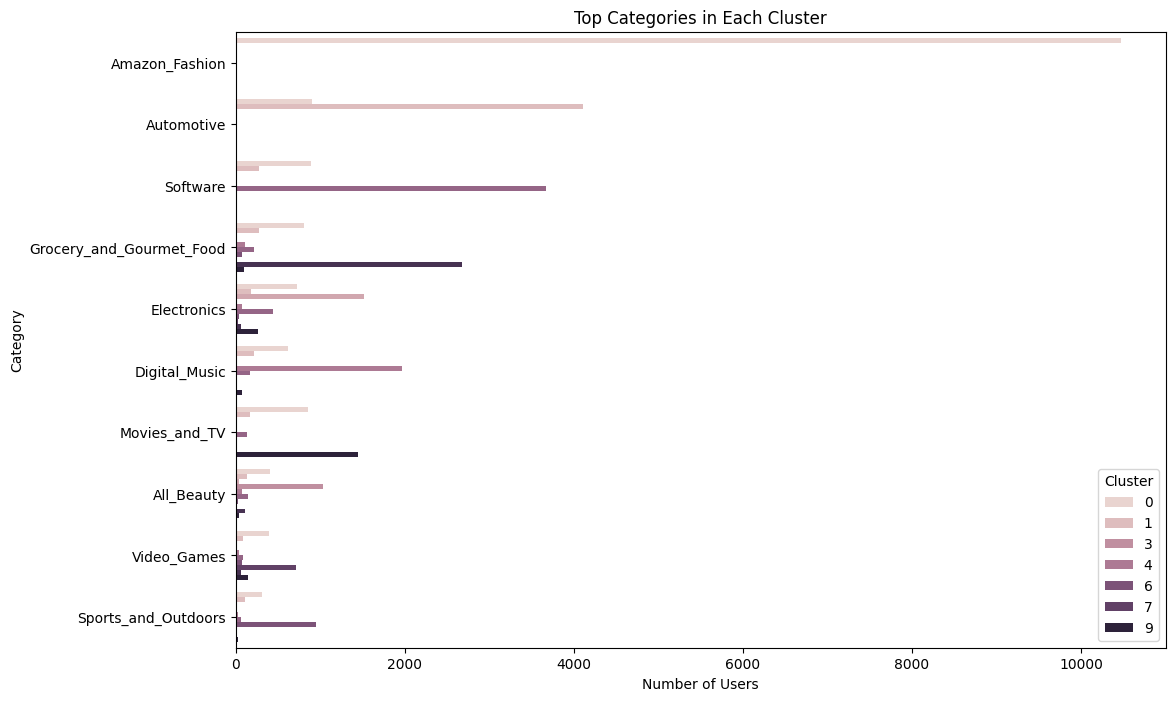

In [147]:
# Get top categories for each cluster
cluster_categories = filtered_cluster_df.groupby('category_cluster')['top_categories'].sum().reset_index() # Changed 'cluster' to 'category_cluster'

# Explode the 'top_categories' column for visualization
cluster_categories_exploded = cluster_categories.explode('top_categories')

# Visualize top categories per cluster
plt.figure(figsize=(12, 8))
sns.countplot(y='top_categories', hue='category_cluster', data=cluster_categories_exploded, # Changed 'cluster' to 'category_cluster'
              order=cluster_categories_exploded['top_categories'].value_counts().index)
plt.title('Top Categories in Each Cluster')
plt.xlabel('Number of Users')
plt.ylabel('Category')
plt.legend(title='Cluster')
plt.show()

In [148]:
# 1. Analyze Top Categories:
for cluster in range(10):
    top_categories = cluster_categories_exploded[cluster_categories_exploded['category_cluster'] == cluster]['top_categories'].value_counts().head(3).index.tolist()
    print(f"Cluster {cluster}: Top categories - {top_categories}") # Fixed indentation

def get_category_cluster_tweets(category_cluster_num, num_samples=5):
    users_in_cluster = filtered_cluster_df[filtered_cluster_df['category_cluster'] == category_cluster_num]['user'].tolist()
    cluster_tweets = tweets_df[tweets_df['user'].isin(users_in_cluster)]['text'].sample(num_samples).tolist()
    return cluster_tweets

for category_cluster in filtered_cluster_df['category_cluster'].unique():
    sample_tweets = get_category_cluster_tweets(category_cluster)
    print(f"Category Cluster {category_cluster}: Sample Tweets:")
    for tweet in sample_tweets:
        print(tweet)
    print("\n")

# Since category_cluster directly corresponds to the category name, we can use it as the label
filtered_cluster_df['cluster_label'] = filtered_cluster_df['category_cluster'].apply(lambda cluster_num: list(category_clusters.keys())[list(category_clusters.values()).index(cluster_num)])

# Display the updated DataFrame with category-based cluster labels:
display(filtered_cluster_df)

Cluster 0: Top categories - ['Amazon_Fashion', 'Automotive', 'Software']
Cluster 1: Top categories - ['Automotive', 'Grocery_and_Gourmet_Food', 'Software']
Cluster 2: Top categories - ['Electronics', 'All_Beauty']
Cluster 3: Top categories - ['All_Beauty']
Cluster 4: Top categories - ['Digital_Music', 'Grocery_and_Gourmet_Food', 'All_Beauty']
Cluster 5: Top categories - ['Software', 'Electronics', 'Grocery_and_Gourmet_Food']
Cluster 6: Top categories - ['Sports_and_Outdoors', 'Video_Games', 'Grocery_and_Gourmet_Food']
Cluster 7: Top categories - ['Video_Games', 'Electronics', 'All_Beauty']
Cluster 8: Top categories - ['Grocery_and_Gourmet_Food', 'All_Beauty', 'Electronics']
Cluster 9: Top categories - ['Movies_and_TV', 'Electronics', 'Video_Games']
Category Cluster 0: Sample Tweets:
oh got much less nice poor guy
watch
hanging crooner wanna sing cant suck
hasnt n episode sploitcast 2 year keep hoping itll come back
watching random 2 half men episode break nothing better


Category Clus

,user,top_categories,category_cluster,adjusted_cluster,cluster_label
0,_TheSpecialOne_,"[Amazon_Fashion, Automotive]",0,0,Amazon_Fashion
1,erinx3leannexo,[Amazon_Fashion],0,0,Amazon_Fashion
2,TLeC,[Amazon_Fashion],0,0,Amazon_Fashion
3,HairByJess,[Amazon_Fashion],0,0,Amazon_Fashion
4,lovesongwriter,"[Amazon_Fashion, Movies_and_TV]",0,0,Amazon_Fashion
...,...,...,...,...,...
28557,rebekahnew,[All_Beauty],3,3,All_Beauty
28558,roycerosenblatt,[All_Beauty],3,3,All_Beauty
28559,afinzel,[All_Beauty],3,3,All_Beauty
28560,Sarah2188,[All_Beauty],3,3,All_Beauty


In [149]:
def get_significant_users_per_category(filtered_cluster_df, tweets_df, top_n=5):
    """
    Extracts the top N users from each category-based cluster, along with a sample tweet and
    their top 3 categories.
    """
    significant_users_per_category = {}
    for category_cluster in filtered_cluster_df['category_cluster'].unique():
        # Get the category name for this cluster
        category_name = list(category_clusters.keys())[list(category_clusters.values()).index(category_cluster)]

        # Filter tweets for this category
        category_tweets = tweets_df[tweets_df['category'].apply(lambda cats: category_name in cats)]

        # Count tweets per user in this category
        user_tweet_counts = category_tweets['user'].value_counts().head(top_n)

        # Get significant user data
        significant_users_data = []
        for user in user_tweet_counts.index:
            # Get a sample tweet from the user
            sample_tweet = tweets_df[tweets_df['user'] == user]['text'].sample(1).values[0]

            # Get the user's top 3 categories
            top_3_categories = user_category_df.loc[user].sort_values(ascending=False).head(3).index.tolist()

            significant_users_data.append({
                'user': user,
                'sample_tweet': sample_tweet,
                'top_3_categories': top_3_categories
            })

        # Store significant users data for this category
        significant_users_per_category[category_name] = significant_users_data

    return significant_users_per_category

# Get significant users and their data
significant_users = get_significant_users_per_category(filtered_cluster_df, tweets_df)

# Print the significant users and their data
for category, users_data in significant_users.items():
    print(f"Category {category}:")
    for user_data in users_data:
        print(f"  User: {user_data['user']}")
        print(f"    Sample Tweet: {user_data['sample_tweet']}")
        print(f"    Top 3 Categories: {user_data['top_3_categories']}")
    print("\n")

Category Amazon_Fashion:
  User: Hollywood_Trey
    Sample Tweet: shit sad
    Top 3 Categories: ['Amazon_Fashion', 'Automotive', 'Movies_and_TV']
  User: nuttychris
    Sample Tweet: well aint mean thing twat dont even twat haha
    Top 3 Categories: ['Amazon_Fashion', 'Software', 'Automotive']
  User: carole29
    Sample Tweet: aww thats sad
    Top 3 Categories: ['Amazon_Fashion', 'Grocery_and_Gourmet_Food', 'Automotive']
  User: MiDesfileNegro
    Sample Tweet: oh well hope feel better soon hug
    Top 3 Categories: ['Amazon_Fashion', 'Digital_Music', 'Grocery_and_Gourmet_Food']
  User: amazingphoebe
    Sample Tweet: everything want say would lie love
    Top 3 Categories: ['Amazon_Fashion', 'Automotive', 'Grocery_and_Gourmet_Food']


Category Automotive:
  User: sebby_peek
    Sample Tweet: love maybe good thing dont care much tell please many chance already
    Top 3 Categories: ['Automotive', 'Amazon_Fashion', 'Grocery_and_Gourmet_Food']
  User: Dogbook
    Sample Tweet: chevy 

In [150]:
import json
import pandas as pd

# Load the JSON data
with open('dataset_tweet-scraper.json', 'r') as f:
    new_tweets_data = json.load(f)

# Create a DataFrame from the JSON data
new_tweets_df = pd.DataFrame(new_tweets_data)

# Preprocess the tweets
new_tweets_df['text'] = new_tweets_df['text'].apply(preprocess_tweet)

# Assign categories
new_tweets_df['category'] = new_tweets_df['text'].apply(assign_category)

# Create a user profile DataFrame
user_profiles = new_tweets_df.groupby('id')['category'].agg(lambda x: pd.Series.mode(x)[0] if not x.empty else []).reset_index()
user_profiles.rename(columns={'id': 'user', 'category': 'top_category'}, inplace=True)

# Display the user profiles
display(user_profiles)

,user,top_category
0,1866286215638426111,[]
1,1866286628647620818,[]
2,1866286887058452590,[]
3,1866287443697131946,[]
4,1866288930968187055,[]
5,1866289122286924076,[Automotive]
6,1866290150080200981,[Grocery_and_Gourmet_Food]
7,1866353281087500636,[]


In [151]:
# Preprocess the tweets using your existing preprocess_tweet function
new_tweets_df['text'] = new_tweets_df['text'].apply(preprocess_tweet)

# Assign categories using your existing assign_category function
new_tweets_df['category'] = new_tweets_df['text'].apply(assign_category)

# Display the DataFrame with categories
display(new_tweets_df)

,id,viewCount,twitterUrl,text,createdAt,likeCount,retweetCount,quoteCount,category
0,1866353281087500636,1431,https://twitter.com/marvinmusk/status/18663532...,call language,Tue Dec 10 05:24:32 +0000 2024,35,4,3,[]
1,1866290150080200981,3815,https://twitter.com/marvinmusk/status/18662901...,could dinner living celebrity would aoprah win...,Tue Dec 10 01:13:40 +0000 2024,172,32,6,[Grocery_and_Gourmet_Food]
2,1866289122286924076,2379,https://twitter.com/marvinmusk/status/18662891...,honest agree elon musk one greatest engineer t...,Tue Dec 10 01:09:35 +0000 2024,182,30,3,[Automotive]
3,1866288930968187055,2577,https://twitter.com/marvinmusk/status/18662889...,tell person picture,Tue Dec 10 01:08:49 +0000 2024,62,11,4,[]
4,1866287443697131946,1378,https://twitter.com/marvinmusk/status/18662874...,see post feed comment anything even dot let se...,Tue Dec 10 01:02:55 +0000 2024,98,10,1,[]
5,1866286887058452590,1978,https://twitter.com/marvinmusk/status/18662868...,former first lady michelle obama remembered,Tue Dec 10 01:00:42 +0000 2024,32,6,3,[]
6,1866286628647620818,1740,https://twitter.com/marvinmusk/status/18662866...,trust bill gate human livestock vaccine yes,Tue Dec 10 00:59:40 +0000 2024,40,9,1,[]
7,1866286215638426111,4434,https://twitter.com/marvinmusk/status/18662862...,tell truth would still support threw prison yes b,Tue Dec 10 00:58:02 +0000 2024,271,39,5,[]


In [152]:
# Assign users to clusters based on their top category
user_profiles['category_cluster'] = user_profiles['top_category'].apply(lambda top_cat: category_clusters.get(top_cat, -1) if isinstance(top_cat, str) else -1)

# -1 represents users with no assigned top category or a top category not in your predefined list

# Display the user profiles with cluster assignments
display(user_profiles)

,user,top_category,category_cluster
0,1866286215638426111,[],-1
1,1866286628647620818,[],-1
2,1866286887058452590,[],-1
3,1866287443697131946,[],-1
4,1866288930968187055,[],-1
5,1866289122286924076,[Automotive],-1
6,1866290150080200981,[Grocery_and_Gourmet_Food],-1
7,1866353281087500636,[],-1


In [153]:
import json
import pandas as pd
from collections import Counter

# Create user profiles with top category based on frequency
def get_top_category(categories_list):
    """
    Returns the top category from a list of category lists.
    Handles empty lists and lists with multiple categories per tweet.
    """
    # Check if the Series is empty instead of using 'if not categories_list'
    if categories_list.empty:
        return None  # Handle cases where there are no categories for the user

    # Flatten the categories_list (list of lists)
    all_categories = [cat for sublist in categories_list for cat in sublist]

    # If flattened list is empty (no categories), return None
    if not all_categories:
        return None

    # Find the most frequent category using Counter
    top_category = Counter(all_categories).most_common(1)[0][0]
    return top_category

# Group the DataFrame by 'id' and apply the function to get the top category
user_profiles = new_tweets_df.groupby('id')['category'].agg(get_top_category).reset_index()
user_profiles.rename(columns={'id': 'user', 'category': 'top_category'}, inplace=True)

# Assign users to clusters based on their top category
user_profiles['category_cluster'] = user_profiles['top_category'].apply(lambda top_cat: category_clusters.get(top_cat, -1))  # Use default -1 if category not found

# Display the user profiles with cluster assignments
display(user_profiles)

,user,top_category,category_cluster
0,1866286215638426111,None,-1
1,1866286628647620818,None,-1
2,1866286887058452590,None,-1
3,1866287443697131946,None,-1
4,1866288930968187055,None,-1
5,1866289122286924076,Automotive,1
6,1866290150080200981,Grocery_and_Gourmet_Food,8
7,1866353281087500636,None,-1
